In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.__version__

/Users/kirakempinska/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.13.1'

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
import pathlib
data_root_orig = tf.keras.utils.get_file('flower_photos',
                                         'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', 
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

228818944/228813984 [==============================] - 32s 0us/step
/Users/kirakempinska/.keras/datasets/flower_photos


In [6]:
for item in data_root.iterdir():
    print(item)

/Users/kirakempinska/.keras/datasets/flower_photos/roses
/Users/kirakempinska/.keras/datasets/flower_photos/sunflowers
/Users/kirakempinska/.keras/datasets/flower_photos/daisy
/Users/kirakempinska/.keras/datasets/flower_photos/dandelion
/Users/kirakempinska/.keras/datasets/flower_photos/tulips
/Users/kirakempinska/.keras/datasets/flower_photos/LICENSE.txt


In [7]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [9]:
all_image_paths[:10]

['/Users/kirakempinska/.keras/datasets/flower_photos/sunflowers/265450085_6e9f276e2e.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/sunflowers/6199086734_b7ddc65816_m.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/tulips/3501996215_1c6d1a3386_n.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/tulips/16265883604_92be82b973.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/dandelion/14200639491_2a4611916d_n.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/sunflowers/9216286876_289a4779f7.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/tulips/5700394524_dc6f8fa9cd_n.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/roses/5156037859_1673720a11_m.jpg',
 '/Users/kirakempinska/.keras/datasets/flower_photos/roses/3697780051_83e50a6dd1_m.jpg']

In [10]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [11]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])
    

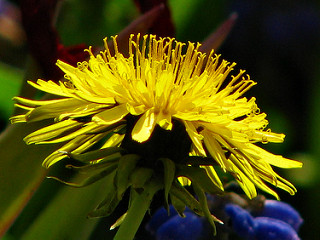

Image (CC BY 2.0)  by Andreas.



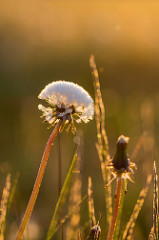

Image (CC BY 2.0)  by Susanne Nilsson



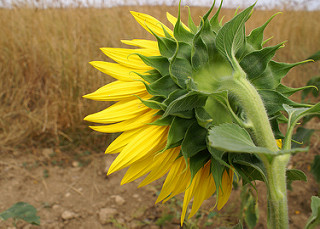

Image (CC BY 2.0)  by Randi Hausken



In [12]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

In [18]:
all_image_paths[0]

'/Users/kirakempinska/.keras/datasets/flower_photos/sunflowers/265450085_6e9f276e2e.jpg'

* Load city data

In [27]:
import sys
import os

In [24]:
sys.path.append('../')

In [25]:
from settings import FIGPATH

In [28]:
figpath = os.path.join(FIGPATH,'figures_20000')

In [32]:
data_root = pathlib.Path(figpath)
print(data_root)

../reports/figures/figures_20000


In [35]:
import random
all_image_paths = list(data_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

353

In [36]:
all_image_paths[:10]

['../reports/figures/figures_20000/BR_1_city_31.png',
 '../reports/figures/figures_20000/CN_1_city_67.png',
 '../reports/figures/figures_20000/IN_1_city_193.png',
 '../reports/figures/figures_20000/IN_1_city_51.png',
 '../reports/figures/figures_20000/CM_1_city_3.png',
 '../reports/figures/figures_20000/KZ_1_city_1.png',
 '../reports/figures/figures_20000/PH_2_city_1.png',
 '../reports/figures/figures_20000/FR_1_city_3.png',
 '../reports/figures/figures_20000/FR_1_city_7.png',
 '../reports/figures/figures_20000/AR_1_city_2.png']

In [19]:
import pathlib

In [14]:
import tensorflow as tf

In [15]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [16]:
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

In [38]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [40]:
all_image_paths

['../reports/figures/figures_20000/BR_1_city_31.png',
 '../reports/figures/figures_20000/CN_1_city_67.png',
 '../reports/figures/figures_20000/IN_1_city_193.png',
 '../reports/figures/figures_20000/IN_1_city_51.png',
 '../reports/figures/figures_20000/CM_1_city_3.png',
 '../reports/figures/figures_20000/KZ_1_city_1.png',
 '../reports/figures/figures_20000/PH_2_city_1.png',
 '../reports/figures/figures_20000/FR_1_city_3.png',
 '../reports/figures/figures_20000/FR_1_city_7.png',
 '../reports/figures/figures_20000/AR_1_city_2.png',
 '../reports/figures/figures_20000/IN_1_city_167.png',
 '../reports/figures/figures_20000/CN_1_city_63.png',
 '../reports/figures/figures_20000/IN_1_city_124.png',
 '../reports/figures/figures_20000/IR_1_city_10.png',
 '../reports/figures/figures_20000/CO_1_city_3.png',
 '../reports/figures/figures_20000/US_1_city_28.png',
 '../reports/figures/figures_20000/IN_1_city_112.png',
 '../reports/figures/figures_20000/IN_1_city_172.png',
 '../reports/figures/figures_2

In [39]:
path_ds

<DatasetV1Adapter shapes: (), types: tf.string>

In [41]:
print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

shape:  TensorShape([])
type:  <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [43]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [44]:
type(image_ds)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

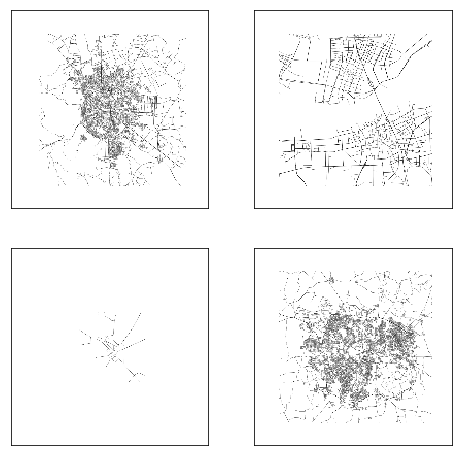

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
#    plt.xlabel(caption_image(all_image_paths[n]))

In [ ]:
images

In [58]:
ds= image_ds.batch(10)

In [60]:
??ds.take

In [61]:
import sys
import os
import tensorflow as tf


def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0  # normalize to [0,1] range

    return image


def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image)


def get_filepaths(dirpath):
    """
    Return paths of all files in a directory.
    :param dirpath:
    :return:
    """
    data_root = pathlib.Path(dirpath)
    all_image_paths = list(data_root.glob('*'))
    all_image_paths = [str(path) for path in all_image_paths]
    random.shuffle(all_image_paths)

    return all_image_paths


def load_dataset(dirpath):

    all_image_paths = get_filepaths(dirpath)
    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
    image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    return image_ds



In [63]:
ds = load_dataset(figpath)

* Load data using CityImageDataset class

In [210]:
from torch.utils import data
import sys

sys.path.append('../')

from src.data.invert import Invert
from torchvision import datasets
# from skimage import io, transform
import os

from PIL import Image

class CityImageDataset(data.Dataset):
    """
    Urban images dataset.
    """

    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.image_files = [f for f in os.listdir(root) if not f.startswith('.')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root,self.image_files[idx])
        sample = Image.open(img_name)

        if self.transform:
            sample = self.transform(sample)

        return sample, 0

In [207]:
from settings import FIGPATH
import matplotlib.pyplot as plt
# data_path = os.path.join(FIGPATH,'figures_20000','train','0')
data_path = os.path.join(FIGPATH,'figures_20000')

city_dataset = CityImageDataset(root=data_path)

fig = plt.figure()

for i in range(len(city_dataset)):
    sample,_ = city_dataset[i]
    print(sample.size)

    if i == 3:
        sample.show()
        break

TypeError: 'tuple' object is not callable

<Figure size 432x288 with 0 Axes>

In [211]:
from torchvision import transforms
from src.data.invert import Invert

city_dataset2 = CityImageDataset(root=data_path,transform=transforms.Compose([
    transforms.Grayscale(),
    Invert(),
    transforms.RandomCrop(350),
    transforms.Resize(256),
#     transforms.ToTensor(),
]))

fig = plt.figure()

for i in range(len(city_dataset2)):
    sample,_ = city_dataset2[i]
    sample.show()
    if i == 2:
        break

<Figure size 432x288 with 0 Axes>

* Plot mean image

Option 1: working with PIL images

In [80]:
import numpy as np

In [81]:
# data_path = os.path.join(FIGPATH,'figures_20000')
data_path = os.path.join(FIGPATH,'figures_20000_padded','train','0')

In [82]:
city_dataset = CityImageDataset(root=data_path,transform=transforms.Compose([
    transforms.Grayscale(),
    Invert(),
    transforms.RandomCrop(350),
]))

In [83]:
samples = []
for i in range(len(city_dataset)):
    sample,_ = city_dataset[i]
    samples.append(np.array(sample))

In [23]:
city_dataset.image_files

['IN_1_city_194.png',
 'US_1_city_3.png',
 'IN_1_city_143.png',
 'IN_1_city_221.png',
 'UK_1_city_2.png',
 'DE_1_city_10.png',
 'IN_1_city_226.png',
 'PK_1_city_9.png',
 'KE_1_city_2.png',
 'MA_1_city_2.png',
 'PH_1_city_2.png',
 'IN_1_city_27.png',
 'MX_1_city_7.png',
 'CN_1_city_40.png',
 'CN_1_city_33.png',
 'ID_5_city_3.png',
 'CN_1_city_113.png',
 'IN_1_city_135.png',
 'ID_16_city_1.png',
 'IN_1_city_94.png',
 'ID_5_city_1.png',
 'CN_1_city_35.png',
 'IN_1_city_46.png',
 'CN_1_city_129.png',
 'US_1_city_25.png',
 'IN_1_city_127.png',
 'UA_1_city_2.png',
 'US_1_city_24.png',
 'IN_1_city_90.png',
 'IN_1_city_118.png',
 'BD_1_city_7.png',
 'JP_1_city_8.png',
 'CG_1_city_1.png',
 'CN_1_city_117.png',
 'KR_1_city_9.png',
 'CN_1_city_12.png',
 'CN_1_city_126.png',
 'IN_1_city_100.png',
 'SA_1_city_5.png',
 'UZ_1_city_4.png',
 'ID_5_city_9.png',
 'EG_1_city_4.png',
 'IN_1_city_107.png',
 'CD_1_city_3.png',
 'IN_1_city_99.png',
 'MX_1_city_28.png',
 'SA_1_city_1.png',
 'CN_1_city_137.png'

In [84]:
arr = np.array(samples)

In [85]:
arr.shape

(353, 350, 350)

In [86]:
sample_mean = np.mean(arr,axis=0)

In [87]:
np.min(sample_mean)

6.830028328611898

In [88]:
np.max(sample_mean)

29.03682719546742

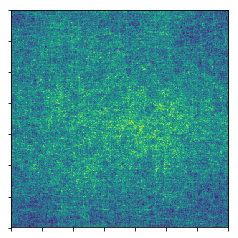

In [89]:
plt.imshow(sample_mean)

Option 2: working with Tensors

In [272]:
data_path = os.path.join(FIGPATH,'figures_20000_padded','train','0')

In [281]:
city_dataset = CityImageDataset(root=data_path,transform=transforms.Compose([
    transforms.Grayscale(),
    Invert(),
    transforms.RandomCrop(350),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
]))

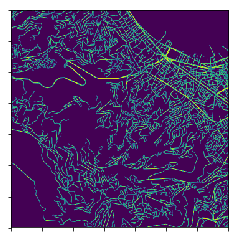

In [280]:
plt.imshow(np.squeeze(city_dataset[0][0].numpy()))

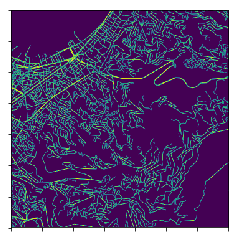

In [278]:
plt.imshow(np.squeeze(city_dataset[0][0].numpy()))

In [125]:
samples = []
for i in range(len(city_dataset)):
    sample,_ = city_dataset[i]
    samples.append(sample.numpy())

torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([

torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])


In [126]:
arr = np.array(samples)

In [127]:
arr.shape

(353, 1, 350, 350)

In [128]:
sample_mean = np.squeeze(np.mean(arr,axis=0))

In [129]:
sample_mean.shape

(350, 350)

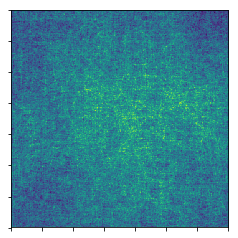

In [76]:
plt.imshow(sample_mean)

In [77]:
np.min(sample_mean)

0.02417375

In [78]:
np.max(sample_mean)

0.12576795

* Subtract mean from image dataset

In [130]:
def get_images_mean(image_dataset):
    """
    Get mean of image tensors.
    :param image_dataset:
    :return:
    """

    samples = []
    for i in range(len(image_dataset)):
        sample, _ = image_dataset[i]
        samples.append(sample.numpy())

    arr = np.array(samples)
    sample_mean = np.squeeze(np.mean(arr,axis=0))
    return sample_mean


In [131]:
city_dataset = CityImageDataset(root=data_path,transform=transforms.Compose([
    transforms.Grayscale(),
    Invert(),
    transforms.RandomCrop(350),
    transforms.ToTensor(),
]))

In [132]:
image_mean = get_images_mean(city_dataset)

torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([

torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])
torch.Size([1, 350, 350])


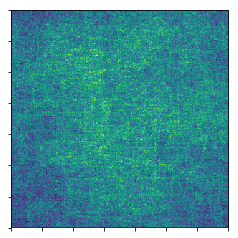

In [133]:
plt.imshow(image_mean)

In [243]:
city_dataset_normalized = CityImageDataset(root=data_path,transform=transforms.Compose([
    transforms.Grayscale(),
    Invert(),
    transforms.RandomCrop(350),
    transforms.ToTensor(),
#     Normalize(image_mean),
]))

In [236]:
city_dataset_normalized[0]

IndexError: index 1 is out of bounds for dimension 0 with size 1

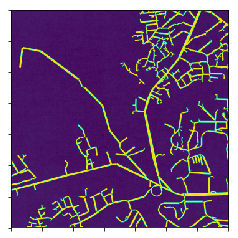

In [227]:
plt.imshow(np.squeeze((city_dataset_normalized[0][0]-torch.from_numpy(image_mean_expanded)).numpy()))

In [228]:
len(image_mean.shape)

2

In [231]:
type(image_mean)

numpy.ndarray

In [233]:
assert isinstance(image_mean,np.ndarray)

In [229]:
image_mean

array([[0.0713881 , 0.06403375, 0.06934399, ..., 0.05506859, 0.04417042,
        0.04093762],
       [0.06494474, 0.05990113, 0.05316892, ..., 0.05340221, 0.0429484 ,
        0.04625896],
       [0.06306727, 0.0519358 , 0.05299116, ..., 0.05282453, 0.0517025 ,
        0.05510193],
       ...,
       [0.04273732, 0.04622563, 0.04831417, ..., 0.03679387, 0.04719214,
        0.04352608],
       [0.04047104, 0.04300394, 0.05018053, ..., 0.05020274, 0.04836972,
        0.04320391],
       [0.05093596, 0.0543354 , 0.05263567, ..., 0.05311336, 0.04658113,
        0.04122647]], dtype=float32)

In [239]:
norm = Normalize(image_mean)

In [244]:
city_dataset_normalized[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.1412, 0.2824],
          [0.0000, 0.0000, 0.0000,  ..., 0.9843, 1.0000, 1.0000],
          [0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]), 0)

In [247]:
norm(city_dataset_normalized[0])

(tensor([[[-0.0714, -0.0640, -0.0693,  ..., -0.0551, -0.0442, -0.0409],
          [-0.0649, -0.0599, -0.0532,  ..., -0.0534, -0.0429, -0.0463],
          [-0.0631, -0.0519, -0.0530,  ..., -0.0528, -0.0517, -0.0551],
          ...,
          [-0.0427, -0.0462, -0.0483,  ...,  0.3554,  0.0195, -0.0435],
          [-0.0405, -0.0430, -0.0502,  ...,  0.9498,  0.8614,  0.2941],
          [-0.0509, -0.0543, -0.0526,  ...,  0.5194,  0.9338,  0.9588]]]), 0)

In [256]:
class Normalize(object):
    """Remove mean image from tensor."""
    
    def __init__(self, mean_image):
        assert isinstance(image_mean,np.ndarray)
        assert (len(mean_image.shape)==2)
            
        mean_image_expanded = np.expand_dims(mean_image, axis=0)
        self.mean_image = torch.from_numpy(mean_image_expanded)

    def __call__(self, sample):
#         image, label = sample[0], sample[1]
#         image_normalized = image - self.mean_image
        image_normalized = sample - self.mean_image
        return image_normalized #, label

In [248]:
crop = transforms.RandomCrop(350)

In [252]:
??crop

In [251]:
crop(city_dataset_normalized[0][0])

TypeError: cannot unpack non-iterable builtin_function_or_method object

In [257]:
city_dataset_normalized = CityImageDataset(root=data_path,transform=transforms.Compose([
    transforms.Grayscale(),
    Invert(),
    transforms.RandomCrop(350),
    transforms.ToTensor(),
    Normalize(image_mean),
]))

In [258]:
city_dataset_normalized[0]

(tensor([[[-0.0714, -0.0640, -0.0693,  ..., -0.0551, -0.0442, -0.0409],
          [-0.0649, -0.0599, -0.0532,  ..., -0.0534, -0.0429, -0.0463],
          [-0.0631, -0.0519, -0.0530,  ..., -0.0528, -0.0517, -0.0551],
          ...,
          [-0.0427, -0.0462, -0.0483,  ..., -0.0368, -0.0472, -0.0435],
          [-0.0405, -0.0430, -0.0502,  ..., -0.0502, -0.0484, -0.0432],
          [-0.0509, -0.0543, -0.0526,  ..., -0.0531, -0.0466, -0.0412]]]), 0)

In [152]:
(sample.numpy() - image_mean_expanded).shape

(1, 350, 350)

In [178]:
image_mean.shape

(350, 350)

In [134]:
image_mean_expanded = np.expand_dims(image_mean, axis=0)

In [179]:
image_mean_expanded.shape

(1, 350, 350)

In [115]:
samples = []
for i in range(len(city_dataset_normalized)):
    sample,_ = city_dataset[i]
    samples.append(sample)

KeyboardInterrupt: 

In [145]:
sample = city_dataset_normalized[0]

RuntimeError: output with shape [1, 350, 350] doesn't match the broadcast shape [1, 1, 1, 350, 350]

In [41]:
sample,_ = city_dataset[0]

# Normalise array to 0-1 range (needed if working with tensors)
#     normalized = (sample-np.min(sample))/(np.max(sample)-np.min(sample))

sample_mean = np.mean(sample)

sample_01 = sample - sample_mean

In [43]:
type(sample)

PIL.Image.Image

Traceback (most recent call last):
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiproces

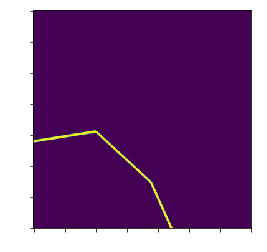

In [34]:
plt.imshow(sample_01)

In [37]:
np.mean(np.array(sample))

2.376530612244898

In [32]:
for i in range(len(city_dataset)):
    sample,_ = city_dataset[i]
    
    # Normalise array to 0-1 range (needed if working with tensors)
#     normalized = (sample-np.min(sample))/(np.max(sample)-np.min(sample))

    sample_mean = np.mean(sample)

    sample_01 = sample - sample_mean
    

KeyboardInterrupt: 

In [31]:
normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
import numpy as np
np.array(sample)

array([[ 0,  0,  0, ...,  0,  0, 55],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [5]:
city_dataset = CityImageDataset(root=data_path)

In [6]:
len(city_dataset)

353

In [9]:
import torch

transform = transforms.Compose([
    transforms.ToTensor()
])

city_dataset = CityImageDataset(root=data_path)


dataloader = torch.utils.data.DataLoader(city_dataset, batch_size=len(city_dataset), shuffle=False, num_workers=4)



In [10]:
fixed_x, _ = next(iter(dataloader))

Exception ignored in: <function _DataLoaderIter.__del__ at 0x11f13ee18>
Traceback (most recent call last):
  File "/Users/kirakempinska/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/Users/kirakempinska/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/Users/kirakempinska/anaconda3/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


OSError: Traceback (most recent call last):
  File "/Users/kirakempinska/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/Users/kirakempinska/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-1-946aea9a0bbd>", line 28, in __getitem__
    sample = Image.open(img_name)
  File "/Users/kirakempinska/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 2609, in open
    fp = builtins.open(filename, "rb")
OSError: [Errno 24] Too many open files: '../reports/figures/figures_20000/train/0/IN_1_city_94.png'


In [ ]:

pop_mean = []
pop_std0 = []
pop_std1 = []
for i, (data,_) in enumerate(dataloader):
    # shape (batch_size, 3, height, width)
    numpy_image = data['image'].numpy()
    
    # shape (3,)
    batch_mean = np.mean(numpy_image, axis=(0,2,3))
    batch_std0 = np.std(numpy_image, axis=(0,2,3))
    batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    
    pop_mean.append(batch_mean)
    pop_std0.append(batch_std0)
    pop_std1.append(batch_std1)

# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)
pop_mean = np.array(pop_mean).mean(axis=0)
pop_std0 = np.array(pop_std0).mean(axis=0)
pop_std1 = np.array(pop_std1).mean(axis=0)